In [1]:
import numpy as np

# Parameter Optimization

In [2]:
class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr

    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key]

In [3]:
class Momentum:
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None

    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)

        for key in params.keys():
            self.v[key] = self.momentum * self.v[key] - self.lr * grads[key]
            params[key] += self.v[key]

In [4]:
class AdaGrad:
    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None

    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)

        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)

In [5]:
class Adam:
    def __init__(self, lr=0.001, beta1=0.9, beta2=0.999):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.iter = 0
        self.m = None
        self.v = None

    def update(self, params, grads):
        if self.m is None:
            self.m, self.v = {}, {}
            for key, val in params.items():
                self.m[key] = np.zeros_like(val)
                self.v[key] = np.zeros_like(val)

        self.iter += 1
        lr_t = self.lr * np.sqrt(1.0 - self.beta2 ** self.iter) / (1.0 - self.beta1 ** self.iter)

        for key in params.keys():
            self.m[key] += (1.0 - self.beta1) * (grads[key] - self.m[key])
            self.v[key] += (1.0 - self.beta2) * (grads[key]**2 - self.v[key])

            params[key] -= lr_t * self.m[key] / (np.sqrt(self.v[key]) + 1e-7)

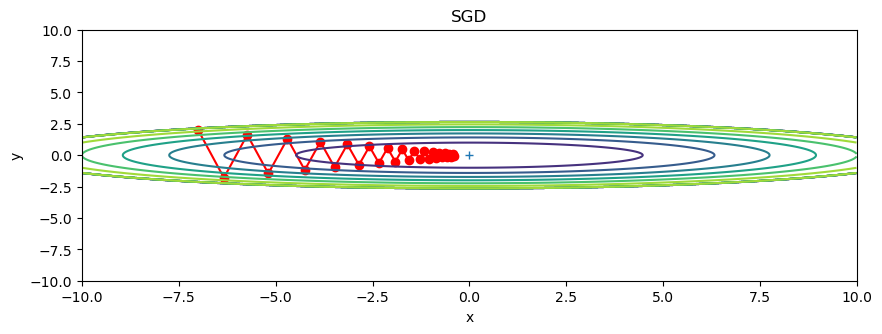

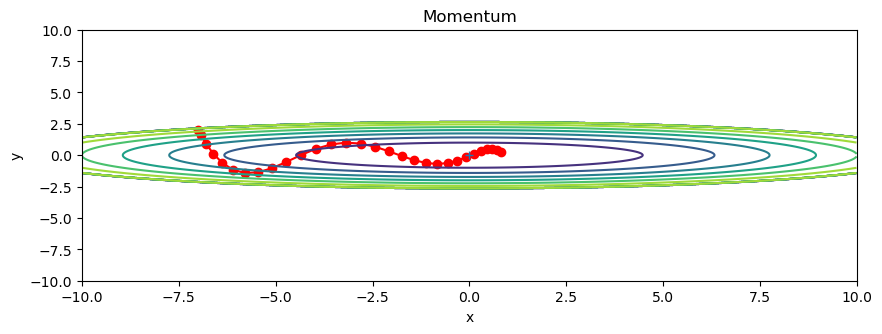

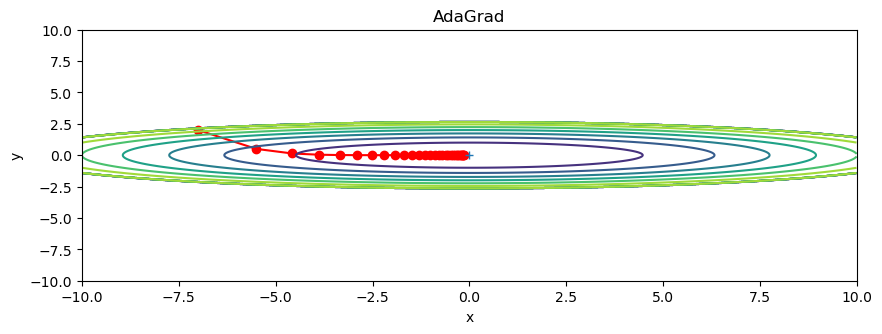

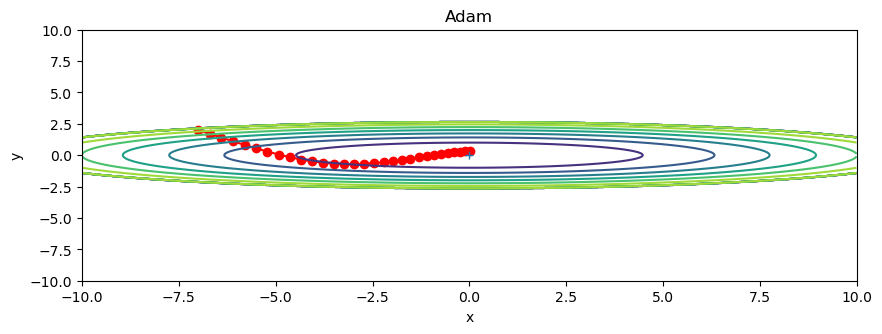

In [6]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
from common.optimizer import *

def f(x, y):
    return x**2 / 20.0 + y**2

def df(x, y):
    return x / 10.0, 2.0*y

init_pos = (-7.0, 2.0)
params = {}
params['x'], params['y'] = init_pos[0], init_pos[1]
grads = {}
grads['x'], grads['y'] = 0, 0

optimizers = OrderedDict()
optimizers['SGD'] = SGD(lr=0.95)
optimizers['Momentum'] = Momentum(lr=0.1)
optimizers['AdaGrad'] = AdaGrad(lr=1.5)
optimizers['Adam'] = Adam(lr=0.3)

idx = 1

for key in optimizers:
    optimizer = optimizers[key]
    x_history = []
    y_history = []
    params['x'], params['y'] = init_pos[0], init_pos[1]

    for i in range(30):
        x_history.append(params['x'])
        y_history.append(params['y'])

        grads['x'], grads['y'] = df(params['x'], params['y'])
        optimizer.update(params, grads)


    x = np.arange(-10, 10, 0.01)
    y = np.arange(-5, 5, 0.01)

    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)

    mask = Z > 7
    Z[mask] = 0

    plt.figure(figsize = (10, 15))
    plt.subplot(4, 1, idx)
    idx += 1
    plt.plot(x_history, y_history, 'o-', color='red')
    plt.contour(X, Y, Z)
    plt.ylim(-10, 10)
    plt.xlim(-10, 10)
    plt.plot(0, 0, '+')
    plt.title(key)
    plt.xlabel("x")
    plt.ylabel("y")

plt.show()

===========iteration:0===========
SGD:2.4578250056868627
Momentum:2.3090918891289745
AdaGrad:2.443087227838161
Adam:2.192336334352505
===========iteration:100===========
SGD:1.7144626536940304
Momentum:0.31336325379392393
AdaGrad:0.1486749575511441
Adam:0.23611605058414614
===========iteration:200===========
SGD:0.9875628613109202
Momentum:0.2716448658892482
AdaGrad:0.12299965224518547
Adam:0.1770644713588826
===========iteration:300===========
SGD:0.6469219128780228
Momentum:0.1379601900457374
AdaGrad:0.06673066118789987
Adam:0.134314701126372
===========iteration:400===========
SGD:0.47082044642767407
Momentum:0.1685355174559682
AdaGrad:0.04444620108477937
Adam:0.10310272384200622
===========iteration:500===========
SGD:0.39934113272079236
Momentum:0.14164558733885013
AdaGrad:0.061344713057760465
Adam:0.0863212286074265
===========iteration:600===========
SGD:0.5405975313595459
Momentum:0.20478445741793277
AdaGrad:0.09821146351992985
Adam:0.13747919602222253
===========iteration:700=

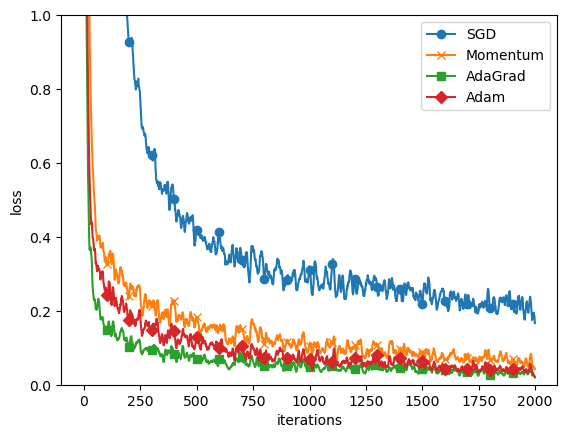

In [7]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *


(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000

optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()

networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []


for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)

        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)

    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


markers = {'SGD': 'o', 'Momentum': 'x', 'AdaGrad': 's', 'Adam': 'D'}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()

# Parameter Initialization

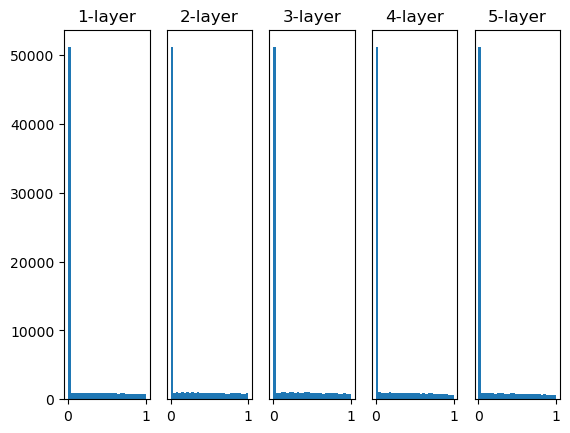

In [8]:
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def ReLU(x):
    return np.maximum(0, x)

def tanh(x):
    return np.tanh(x)

input_data = np.random.randn(1000, 100)
node_num = 100
hidden_layer_size = 5
activations = {}

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # Initialization Value
    # w = np.random.randn(node_num, node_num) * 1
    # w = np.random.randn(node_num, node_num) * 0.01
    # w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)

    a = np.dot(x, w)

    # Activation Function
    # z = sigmoid(a)
    z = ReLU(a)
    # z = tanh(a)

    activations[i] = z


# histogram
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

===========iteration:0===========
std=0.01:2.3025133103585227
Xavier:2.3075988392991205
He:2.4130951404779917
===========iteration:100===========
std=0.01:2.3024108853654663
Xavier:2.243886535743254
He:1.6050034900512187
===========iteration:200===========
std=0.01:2.3014582407990924
Xavier:2.086570112316788
He:0.8168277174129341
===========iteration:300===========
std=0.01:2.3013062444760233
Xavier:1.7140211267507088
He:0.48948065278003694
===========iteration:400===========
std=0.01:2.2974208618997762
Xavier:1.1048108054888388
He:0.3645886671588303
===========iteration:500===========
std=0.01:2.3016845483011963
Xavier:0.781189885053333
He:0.2582417868330201
===========iteration:600===========
std=0.01:2.305611933916601
Xavier:0.6669713059447873
He:0.28383299637429316
===========iteration:700===========
std=0.01:2.2982650130669553
Xavier:0.5207202505816525
He:0.27068072729474457
===========iteration:800===========
std=0.01:2.297081308499427
Xavier:0.5069213384880074
He:0.2904856326708

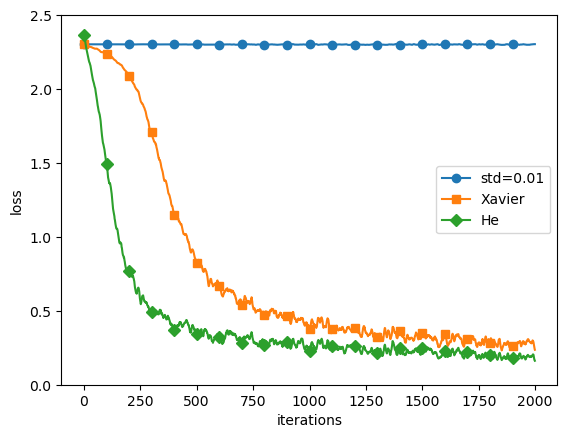

In [9]:
import os
import sys
sys.path.append(os.pardir)

import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD


(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000

weight_init_types = {'std=0.01': 0.01, 'Xavier': 'sigmoid', 'He': 'relu'}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                                  output_size=10, weight_init_std=weight_type)
    train_loss[key] = []

for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)

        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)

    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


markers = {'std=0.01': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()

# Batch Normalization

============== 1/16 ==============
epoch:0 | 0.097 - 0.102


c:\Users\jaeyo\OneDrive\바탕 화면\취업\_포닥\github\Deep Learning From Scratch 1\common\multi_layer_net_extend.py:104: RuntimeWarning: overflow encountered in square
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
c:\Users\jaeyo\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
c:\Users\jaeyo\OneDrive\바탕 화면\취업\_포닥\github\Deep Learning From Scratch 1\common\multi_layer_net_extend.py:104: RuntimeWarning: invalid value encountered in double_scalars
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
c:\Users\jaeyo\OneDrive\바탕 화면\취업\_포닥\github\Deep Learning From Scratch 1\common\functions.py:32: RuntimeWarning: invalid value encountered in subtract
  x = x - np.max(x, axis=-1, keepdims=True) # 오버플로 대책


epoch:1 | 0.097 - 0.096
epoch:2 | 0.097 - 0.107
epoch:3 | 0.097 - 0.144
epoch:4 | 0.097 - 0.157
epoch:5 | 0.097 - 0.188
epoch:6 | 0.097 - 0.203
epoch:7 | 0.097 - 0.217
epoch:8 | 0.097 - 0.235
epoch:9 | 0.097 - 0.257
epoch:10 | 0.097 - 0.276
epoch:11 | 0.097 - 0.289
epoch:12 | 0.097 - 0.307
epoch:13 | 0.097 - 0.325
epoch:14 | 0.097 - 0.351
epoch:15 | 0.097 - 0.366
epoch:16 | 0.097 - 0.38
epoch:17 | 0.097 - 0.386
epoch:18 | 0.097 - 0.408


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.097 - 0.425
============== 2/16 ==============
epoch:0 | 0.117 - 0.137
epoch:1 | 0.097 - 0.127
epoch:2 | 0.097 - 0.147
epoch:3 | 0.097 - 0.186
epoch:4 | 0.097 - 0.201
epoch:5 | 0.097 - 0.221
epoch:6 | 0.097 - 0.254
epoch:7 | 0.097 - 0.275
epoch:8 | 0.097 - 0.303
epoch:9 | 0.097 - 0.318
epoch:10 | 0.097 - 0.33
epoch:11 | 0.097 - 0.349
epoch:12 | 0.097 - 0.371
epoch:13 | 0.097 - 0.39
epoch:14 | 0.097 - 0.398
epoch:15 | 0.097 - 0.419
epoch:16 | 0.097 - 0.436
epoch:17 | 0.097 - 0.44
epoch:18 | 0.097 - 0.466
epoch:19 | 0.097 - 0.477


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


============== 3/16 ==============
epoch:0 | 0.122 - 0.079
epoch:1 | 0.339 - 0.094
epoch:2 | 0.49 - 0.147
epoch:3 | 0.594 - 0.186
epoch:4 | 0.669 - 0.224
epoch:5 | 0.712 - 0.263
epoch:6 | 0.771 - 0.311
epoch:7 | 0.8 - 0.346
epoch:8 | 0.839 - 0.381
epoch:9 | 0.857 - 0.401
epoch:10 | 0.882 - 0.44
epoch:11 | 0.894 - 0.467
epoch:12 | 0.903 - 0.492
epoch:13 | 0.921 - 0.504
epoch:14 | 0.943 - 0.529
epoch:15 | 0.951 - 0.553
epoch:16 | 0.961 - 0.572
epoch:17 | 0.969 - 0.596
epoch:18 | 0.978 - 0.608


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.982 - 0.625
============== 4/16 ==============
epoch:0 | 0.162 - 0.091
epoch:1 | 0.315 - 0.109
epoch:2 | 0.408 - 0.167
epoch:3 | 0.466 - 0.222
epoch:4 | 0.552 - 0.299
epoch:5 | 0.585 - 0.378
epoch:6 | 0.626 - 0.45
epoch:7 | 0.662 - 0.521
epoch:8 | 0.709 - 0.564
epoch:9 | 0.716 - 0.593
epoch:10 | 0.724 - 0.626
epoch:11 | 0.763 - 0.649
epoch:12 | 0.765 - 0.675
epoch:13 | 0.786 - 0.697
epoch:14 | 0.787 - 0.717
epoch:15 | 0.809 - 0.74
epoch:16 | 0.824 - 0.755
epoch:17 | 0.829 - 0.774
epoch:18 | 0.845 - 0.782


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.855 - 0.789
============== 5/16 ==============
epoch:0 | 0.074 - 0.12
epoch:1 | 0.073 - 0.205
epoch:2 | 0.079 - 0.314
epoch:3 | 0.086 - 0.41
epoch:4 | 0.094 - 0.49
epoch:5 | 0.098 - 0.546
epoch:6 | 0.113 - 0.607
epoch:7 | 0.124 - 0.651
epoch:8 | 0.128 - 0.689
epoch:9 | 0.133 - 0.711
epoch:10 | 0.142 - 0.735
epoch:11 | 0.147 - 0.76
epoch:12 | 0.145 - 0.778
epoch:13 | 0.145 - 0.795
epoch:14 | 0.149 - 0.809
epoch:15 | 0.147 - 0.828
epoch:16 | 0.146 - 0.836
epoch:17 | 0.155 - 0.846
epoch:18 | 0.157 - 0.86
epoch:19 | 0.153 - 0.868


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


============== 6/16 ==============
epoch:0 | 0.111 - 0.101
epoch:1 | 0.129 - 0.178
epoch:2 | 0.106 - 0.41
epoch:3 | 0.105 - 0.597
epoch:4 | 0.108 - 0.673
epoch:5 | 0.133 - 0.722
epoch:6 | 0.151 - 0.77
epoch:7 | 0.148 - 0.798
epoch:8 | 0.117 - 0.828
epoch:9 | 0.116 - 0.844
epoch:10 | 0.116 - 0.863
epoch:11 | 0.116 - 0.879
epoch:12 | 0.116 - 0.888
epoch:13 | 0.116 - 0.9
epoch:14 | 0.116 - 0.906
epoch:15 | 0.116 - 0.92
epoch:16 | 0.116 - 0.929
epoch:17 | 0.116 - 0.937
epoch:18 | 0.116 - 0.942


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.116 - 0.95
============== 7/16 ==============
epoch:0 | 0.094 - 0.109
epoch:1 | 0.117 - 0.188
epoch:2 | 0.116 - 0.518
epoch:3 | 0.117 - 0.673
epoch:4 | 0.117 - 0.72
epoch:5 | 0.117 - 0.749
epoch:6 | 0.117 - 0.79
epoch:7 | 0.117 - 0.818
epoch:8 | 0.117 - 0.855
epoch:9 | 0.117 - 0.886
epoch:10 | 0.117 - 0.9
epoch:11 | 0.116 - 0.922
epoch:12 | 0.116 - 0.937
epoch:13 | 0.127 - 0.948
epoch:14 | 0.117 - 0.961
epoch:15 | 0.117 - 0.975
epoch:16 | 0.117 - 0.978
epoch:17 | 0.117 - 0.982
epoch:18 | 0.117 - 0.988
epoch:19 | 0.117 - 0.988


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


============== 8/16 ==============
epoch:0 | 0.116 - 0.091
epoch:1 | 0.116 - 0.403
epoch:2 | 0.116 - 0.595
epoch:3 | 0.116 - 0.71
epoch:4 | 0.116 - 0.78
epoch:5 | 0.116 - 0.844
epoch:6 | 0.116 - 0.883
epoch:7 | 0.116 - 0.924
epoch:8 | 0.116 - 0.949
epoch:9 | 0.116 - 0.968
epoch:10 | 0.116 - 0.979
epoch:11 | 0.116 - 0.981
epoch:12 | 0.116 - 0.988
epoch:13 | 0.116 - 0.991
epoch:14 | 0.116 - 0.993
epoch:15 | 0.116 - 0.993
epoch:16 | 0.116 - 0.994
epoch:17 | 0.116 - 0.996
epoch:18 | 0.116 - 0.996


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.116 - 0.997
============== 9/16 ==============
epoch:0 | 0.116 - 0.115
epoch:1 | 0.116 - 0.533
epoch:2 | 0.116 - 0.747
epoch:3 | 0.116 - 0.816
epoch:4 | 0.116 - 0.868
epoch:5 | 0.116 - 0.905
epoch:6 | 0.117 - 0.939
epoch:7 | 0.117 - 0.95
epoch:8 | 0.117 - 0.982
epoch:9 | 0.117 - 0.991
epoch:10 | 0.117 - 0.992
epoch:11 | 0.116 - 0.994
epoch:12 | 0.117 - 0.996
epoch:13 | 0.117 - 0.997
epoch:14 | 0.117 - 0.998
epoch:15 | 0.117 - 0.998
epoch:16 | 0.116 - 0.998
epoch:17 | 0.116 - 0.999
epoch:18 | 0.116 - 0.997


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.116 - 0.999
============== 10/16 ==============
epoch:0 | 0.099 - 0.173
epoch:1 | 0.116 - 0.687
epoch:2 | 0.116 - 0.776
epoch:3 | 0.116 - 0.792
epoch:4 | 0.116 - 0.86
epoch:5 | 0.116 - 0.88
epoch:6 | 0.116 - 0.882
epoch:7 | 0.116 - 0.881
epoch:8 | 0.116 - 0.885
epoch:9 | 0.116 - 0.897
epoch:10 | 0.116 - 0.956
epoch:11 | 0.116 - 0.971
epoch:12 | 0.116 - 0.989
epoch:13 | 0.116 - 0.99
epoch:14 | 0.116 - 0.994
epoch:15 | 0.117 - 0.994
epoch:16 | 0.117 - 0.995
epoch:17 | 0.117 - 0.995
epoch:18 | 0.117 - 0.995
epoch:19 | 0.117 - 0.981


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


============== 11/16 ==============
epoch:0 | 0.116 - 0.218
epoch:1 | 0.116 - 0.558
epoch:2 | 0.116 - 0.574
epoch:3 | 0.117 - 0.695
epoch:4 | 0.117 - 0.801
epoch:5 | 0.117 - 0.775
epoch:6 | 0.117 - 0.873
epoch:7 | 0.117 - 0.756
epoch:8 | 0.117 - 0.878
epoch:9 | 0.117 - 0.892
epoch:10 | 0.117 - 0.957
epoch:11 | 0.117 - 0.975
epoch:12 | 0.117 - 0.96
epoch:13 | 0.117 - 0.975
epoch:14 | 0.117 - 0.951
epoch:15 | 0.117 - 0.97
epoch:16 | 0.117 - 0.987
epoch:17 | 0.117 - 0.987
epoch:18 | 0.117 - 0.994


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.117 - 0.99
============== 12/16 ==============
epoch:0 | 0.094 - 0.218
epoch:1 | 0.094 - 0.46
epoch:2 | 0.094 - 0.613
epoch:3 | 0.094 - 0.718
epoch:4 | 0.117 - 0.707
epoch:5 | 0.117 - 0.771
epoch:6 | 0.117 - 0.682
epoch:7 | 0.117 - 0.843
epoch:8 | 0.117 - 0.811
epoch:9 | 0.116 - 0.87
epoch:10 | 0.116 - 0.884
epoch:11 | 0.117 - 0.886
epoch:12 | 0.117 - 0.887
epoch:13 | 0.117 - 0.888
epoch:14 | 0.116 - 0.892
epoch:15 | 0.116 - 0.894
epoch:16 | 0.116 - 0.815
epoch:17 | 0.116 - 0.886
epoch:18 | 0.116 - 0.891
epoch:19 | 0.116 - 0.894


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


============== 13/16 ==============
epoch:0 | 0.116 - 0.294
epoch:1 | 0.097 - 0.403
epoch:2 | 0.117 - 0.569
epoch:3 | 0.117 - 0.589
epoch:4 | 0.117 - 0.608
epoch:5 | 0.117 - 0.645
epoch:6 | 0.117 - 0.567
epoch:7 | 0.117 - 0.624
epoch:8 | 0.117 - 0.697
epoch:9 | 0.117 - 0.777
epoch:10 | 0.117 - 0.771
epoch:11 | 0.117 - 0.781
epoch:12 | 0.117 - 0.79
epoch:13 | 0.117 - 0.794
epoch:14 | 0.117 - 0.788
epoch:15 | 0.117 - 0.802
epoch:16 | 0.117 - 0.807
epoch:17 | 0.117 - 0.806
epoch:18 | 0.117 - 0.805


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.117 - 0.809
============== 14/16 ==============
epoch:0 | 0.117 - 0.167
epoch:1 | 0.099 - 0.323
epoch:2 | 0.117 - 0.453
epoch:3 | 0.117 - 0.47
epoch:4 | 0.117 - 0.562
epoch:5 | 0.117 - 0.575
epoch:6 | 0.117 - 0.548
epoch:7 | 0.117 - 0.603
epoch:8 | 0.117 - 0.594
epoch:9 | 0.117 - 0.607
epoch:10 | 0.117 - 0.602
epoch:11 | 0.117 - 0.61
epoch:12 | 0.117 - 0.601
epoch:13 | 0.117 - 0.609
epoch:14 | 0.117 - 0.617
epoch:15 | 0.117 - 0.612
epoch:16 | 0.117 - 0.614
epoch:17 | 0.117 - 0.615
epoch:18 | 0.117 - 0.618


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.117 - 0.616
============== 15/16 ==============
epoch:0 | 0.099 - 0.177
epoch:1 | 0.105 - 0.394
epoch:2 | 0.116 - 0.401
epoch:3 | 0.116 - 0.222
epoch:4 | 0.116 - 0.473
epoch:5 | 0.116 - 0.458
epoch:6 | 0.116 - 0.481
epoch:7 | 0.116 - 0.505
epoch:8 | 0.116 - 0.52
epoch:9 | 0.116 - 0.519
epoch:10 | 0.116 - 0.523
epoch:11 | 0.116 - 0.525
epoch:12 | 0.116 - 0.519
epoch:13 | 0.117 - 0.518
epoch:14 | 0.117 - 0.524
epoch:15 | 0.117 - 0.509
epoch:16 | 0.117 - 0.519
epoch:17 | 0.117 - 0.528
epoch:18 | 0.117 - 0.507


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.117 - 0.528
============== 16/16 ==============
epoch:0 | 0.094 - 0.156
epoch:1 | 0.099 - 0.114
epoch:2 | 0.116 - 0.268
epoch:3 | 0.117 - 0.319
epoch:4 | 0.117 - 0.321
epoch:5 | 0.117 - 0.316
epoch:6 | 0.117 - 0.32
epoch:7 | 0.117 - 0.326
epoch:8 | 0.117 - 0.327
epoch:9 | 0.117 - 0.427
epoch:10 | 0.117 - 0.409
epoch:11 | 0.117 - 0.424
epoch:12 | 0.117 - 0.428
epoch:13 | 0.117 - 0.398
epoch:14 | 0.117 - 0.427
epoch:15 | 0.117 - 0.43
epoch:16 | 0.117 - 0.422
epoch:17 | 0.117 - 0.43
epoch:18 | 0.117 - 0.427
epoch:19 | 0.117 - 0.431


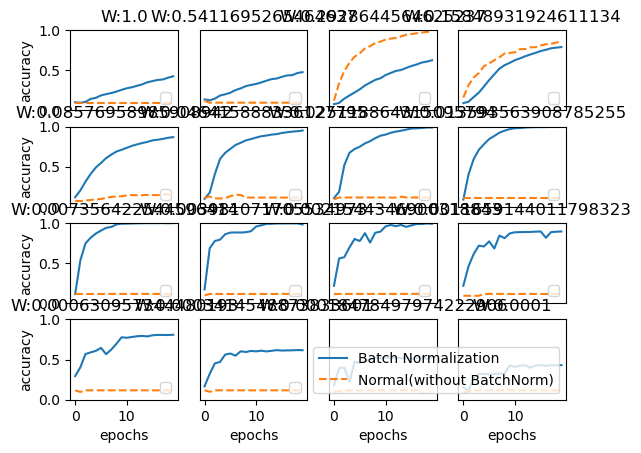

In [10]:
import sys, os
sys.path.append(os.pardir)

import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam


(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

x_train = x_train[:1000]
t_train = t_train[:1000]

max_epoch = 20
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01

def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10,
                                     weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10,
                                  weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)

    train_acc_list = []
    bn_train_acc_list = []

    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0

    for i in range(1000000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]

        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)

        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)

            print('epoch:' + str(epoch_cnt) + ' | ' + str(train_acc) + ' - ' + str(bn_train_acc))

            epoch_cnt += 1
            if epoch_cnt >= max_epoch:
                break


    return train_acc_list, bn_train_acc_list


weight_scale_list = np.logspace(0, -4, num=16)
x = np.arange(max_epoch)

for i, w in enumerate(weight_scale_list):
    print("============== " + str(i+1) + "/16" + " ==============")
    train_acc_list, bn_train_acc_list = __train(w)

    plt.subplot(4, 4, i+1)
    plt.title("W:" + str(w))
    if i == 15:
        plt.plot(x, bn_train_acc_list, label='Batch Normalization', markevery=2)
        plt.plot(x, train_acc_list, linestyle = '--', label='Normal(without BatchNorm)', markevery=2)
    else:
        plt.plot(x, bn_train_acc_list, markevery=2)
        plt.plot(x, train_acc_list, linestyle = '--', markevery=2)

    plt.ylim(0, 1.0)
    if i % 4:
        plt.yticks([])
    else:
        plt.ylabel("accuracy")
    if i < 12:
        plt.xticks([])
    else:
        plt.xlabel("epochs")
    plt.legend(loc='lower right')

plt.show()

# Overfitting

epoch:0, train acc:0.05333333333333334, test acc:0.0609
epoch:1, train acc:0.07666666666666666, test acc:0.067
epoch:2, train acc:0.09333333333333334, test acc:0.0732
epoch:3, train acc:0.11666666666666667, test acc:0.0814
epoch:4, train acc:0.13666666666666666, test acc:0.0935
epoch:5, train acc:0.15666666666666668, test acc:0.1065
epoch:6, train acc:0.18666666666666668, test acc:0.1229
epoch:7, train acc:0.19666666666666666, test acc:0.1418
epoch:8, train acc:0.21333333333333335, test acc:0.1516
epoch:9, train acc:0.24333333333333335, test acc:0.1776
epoch:10, train acc:0.2833333333333333, test acc:0.1973
epoch:11, train acc:0.3233333333333333, test acc:0.2239
epoch:12, train acc:0.36666666666666664, test acc:0.2447
epoch:13, train acc:0.38333333333333336, test acc:0.2547
epoch:14, train acc:0.39, test acc:0.2601
epoch:15, train acc:0.4266666666666667, test acc:0.2738
epoch:16, train acc:0.47333333333333333, test acc:0.3036
epoch:17, train acc:0.49333333333333335, test acc:0.322
epoc

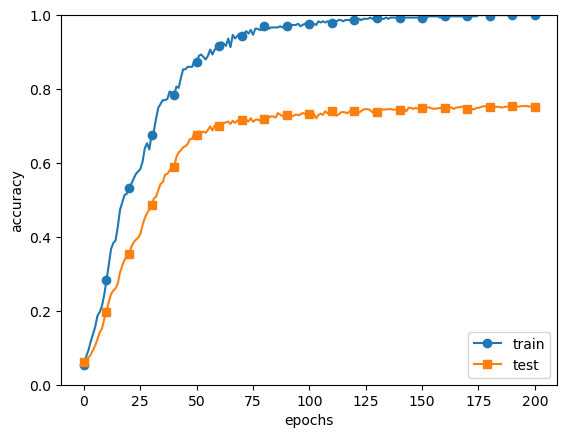

In [11]:
import os
import sys
sys.path.append(os.pardir)

import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD


(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

x_train = x_train[:300]
t_train = t_train[:300]

weight_decay_lambda = 0

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01)

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

# Weight Decay

epoch:0, train acc:0.09, test acc:0.0765
epoch:1, train acc:0.1, test acc:0.0739
epoch:2, train acc:0.10666666666666667, test acc:0.0797
epoch:3, train acc:0.11, test acc:0.0873
epoch:4, train acc:0.12666666666666668, test acc:0.0994
epoch:5, train acc:0.15666666666666668, test acc:0.119
epoch:6, train acc:0.17333333333333334, test acc:0.1355
epoch:7, train acc:0.20333333333333334, test acc:0.162
epoch:8, train acc:0.24, test acc:0.1806
epoch:9, train acc:0.24333333333333335, test acc:0.1972
epoch:10, train acc:0.28, test acc:0.2125
epoch:11, train acc:0.29333333333333333, test acc:0.2291
epoch:12, train acc:0.34, test acc:0.2518
epoch:13, train acc:0.37666666666666665, test acc:0.2756
epoch:14, train acc:0.39, test acc:0.286
epoch:15, train acc:0.4066666666666667, test acc:0.2944
epoch:16, train acc:0.4166666666666667, test acc:0.2997
epoch:17, train acc:0.43333333333333335, test acc:0.3051
epoch:18, train acc:0.43, test acc:0.3079
epoch:19, train acc:0.44333333333333336, test acc:0.3

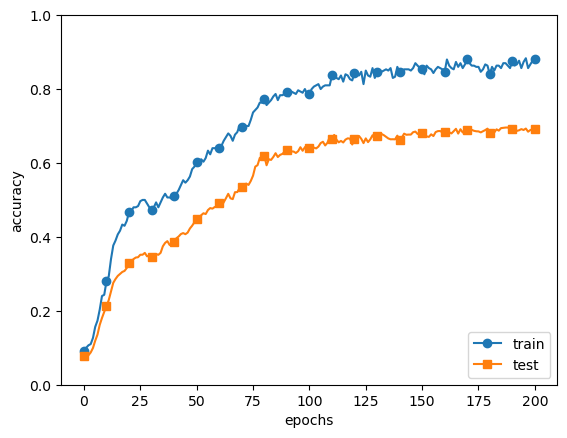

In [12]:
import os
import sys

sys.path.append(os.pardir)
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD


(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

x_train = x_train[:300]
t_train = t_train[:300]

weight_decay_lambda = 0.1

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01)

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

# Dropout

In [13]:
class Dropout:
    def __init__(self, dropout_ratio=0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None

    def forward(self, x, train_flg=True):
        if train_flg:
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            return x * self.mask
        else:
            return x * (1.0 - self.dropout_ratio)

    def backward(self, dout):
        return dout * self.mask

train loss:2.447809545454051
=== epoch:1, train acc:0.08333333333333333, test acc:0.0858 ===
train loss:2.375726964225059
train loss:2.343643238105799
train loss:2.380228397515197
=== epoch:2, train acc:0.09, test acc:0.0829 ===
train loss:2.3686845223916184
train loss:2.3526513178058592
train loss:2.322468828617726
=== epoch:3, train acc:0.09666666666666666, test acc:0.0861 ===
train loss:2.3919195207970954
train loss:2.2957343075354664
train loss:2.305833362934136
=== epoch:4, train acc:0.11, test acc:0.089 ===
train loss:2.300960468482279
train loss:2.2588622155846414
train loss:2.2781689573203314
=== epoch:5, train acc:0.11666666666666667, test acc:0.098 ===
train loss:2.2727676176764207
train loss:2.2791708641901387
train loss:2.2935745686200595
=== epoch:6, train acc:0.12333333333333334, test acc:0.1025 ===
train loss:2.26278170197744
train loss:2.25028459219989
train loss:2.2740669750469222
=== epoch:7, train acc:0.12666666666666668, test acc:0.1068 ===
train loss:2.272939793605

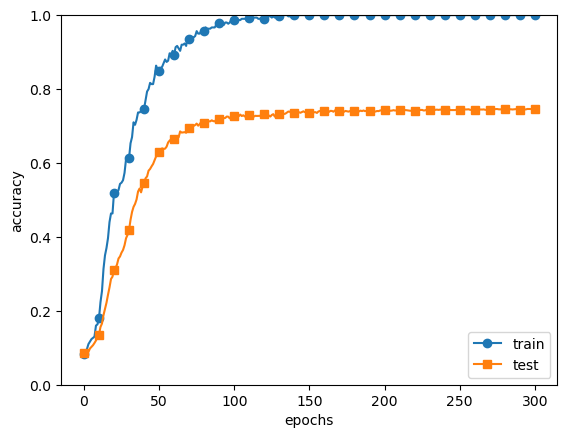

In [15]:
import os
import sys
sys.path.append(os.pardir)

import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer


(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

x_train = x_train[:300]
t_train = t_train[:300]

use_dropout = False
dropout_ratio = 0.2

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                              use_dropout=use_dropout, dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=301, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

train loss:2.3319346342575415
=== epoch:1, train acc:0.08333333333333333, test acc:0.0817 ===
train loss:2.3177651026129267
train loss:2.320321379144258
train loss:2.3107825875050194
=== epoch:2, train acc:0.09, test acc:0.0876 ===
train loss:2.3220733140995953
train loss:2.325007489888065
train loss:2.3436613239030044
=== epoch:3, train acc:0.09, test acc:0.0887 ===
train loss:2.305277449732969
train loss:2.3286692969282496
train loss:2.3214166587107825
=== epoch:4, train acc:0.09333333333333334, test acc:0.0922 ===
train loss:2.3209272391541687
train loss:2.3082441324407568
train loss:2.3199485860187963
=== epoch:5, train acc:0.09333333333333334, test acc:0.094 ===
train loss:2.307105799181276
train loss:2.3140829425612317
train loss:2.294228051721192
=== epoch:6, train acc:0.1, test acc:0.098 ===
train loss:2.3191085929555895
train loss:2.2890872114916987
train loss:2.3023366481904417
=== epoch:7, train acc:0.10333333333333333, test acc:0.1002 ===
train loss:2.320154544967595
train 

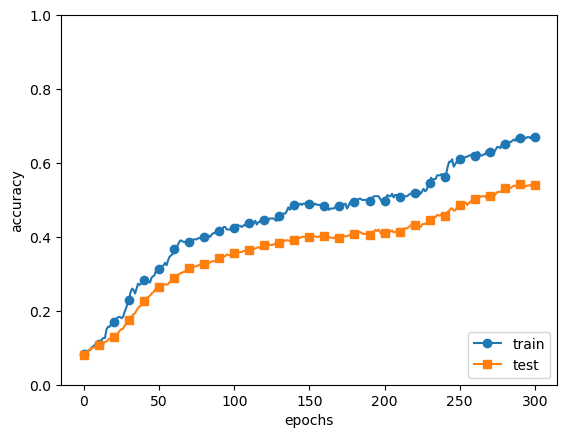

In [16]:
import os
import sys
sys.path.append(os.pardir)

import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer


(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

x_train = x_train[:300]
t_train = t_train[:300]

use_dropout = True
dropout_ratio = 0.2

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                              use_dropout=use_dropout, dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=301, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

val acc:0.08 | lr:3.599746044802304e-06, weight decay:6.297275620928593e-08
val acc:0.14 | lr:6.086431205482028e-06, weight decay:1.864314189437925e-08
val acc:0.12 | lr:2.5737144032867306e-05, weight decay:1.0123140908289836e-08
val acc:0.12 | lr:0.00042096393875605694, weight decay:9.383911103542951e-06
val acc:0.1 | lr:1.6054742244088287e-05, weight decay:1.3245944648745798e-06
val acc:0.08 | lr:4.134315922907849e-05, weight decay:1.9572628826988583e-05
val acc:0.12 | lr:5.042966743775527e-05, weight decay:1.2387352134713895e-08
val acc:0.09 | lr:8.14172332858878e-06, weight decay:4.310576467109498e-08
val acc:0.11 | lr:4.582129687782689e-05, weight decay:2.221347282012658e-06
val acc:0.14 | lr:6.265104451387762e-05, weight decay:1.67530129060536e-08
val acc:0.08 | lr:7.440192390017639e-06, weight decay:2.2260760088939585e-07
val acc:0.31 | lr:0.0031384823428544295, weight decay:2.823751416022624e-07
val acc:0.08 | lr:1.704004658489947e-05, weight decay:6.486663588527606e-06
val acc

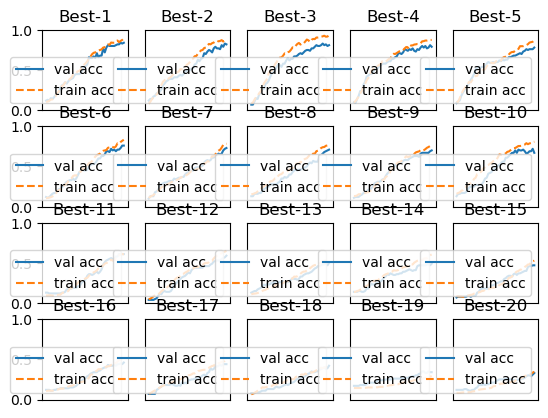

In [17]:
import sys, os
sys.path.append(os.pardir)

import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.util import shuffle_dataset
from common.trainer import Trainer


(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

x_train = x_train[:500]
t_train = t_train[:500]

validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)
x_train, t_train = shuffle_dataset(x_train, t_train)
x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]


def __train(lr, weight_decay, epocs=50):
    network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                            output_size=10, weight_decay_lambda=weight_decay)
    trainer = Trainer(network, x_train, t_train, x_val, t_val,
                      epochs=epocs, mini_batch_size=100,
                      optimizer='sgd', optimizer_param={'lr': lr}, verbose=False)
    trainer.train()

    return trainer.test_acc_list, trainer.train_acc_list


optimization_trial = 100
results_val = {}
results_train = {}
for _ in range(optimization_trial):
    weight_decay = 10 ** np.random.uniform(-8, -4)
    lr = 10 ** np.random.uniform(-6, -2)

    val_acc_list, train_acc_list = __train(lr, weight_decay)
    print("val acc:" + str(val_acc_list[-1]) + " | lr:" + str(lr) + ", weight decay:" + str(weight_decay))
    key = "lr:" + str(lr) + ", weight decay:" + str(weight_decay)
    results_val[key] = val_acc_list
    results_train[key] = train_acc_list


print("=========== Hyper-Parameter Optimization Result ===========")
graph_draw_num = 20
col_num = 5
row_num = int(np.ceil(graph_draw_num / col_num))
i = 0

for key, val_acc_list in sorted(results_val.items(), key=lambda x:x[1][-1], reverse=True):
    print("Best-" + str(i+1) + "(val acc:" + str(val_acc_list[-1]) + ") | " + key)

    plt.subplot(row_num, col_num, i+1)
    plt.title("Best-" + str(i+1))
    plt.ylim(0.0, 1.0)
    if i % 5:
        plt.yticks([])
    plt.xticks([])
    x = np.arange(len(val_acc_list))
    plt.plot(x, val_acc_list, label='val acc')
    plt.plot(x, results_train[key], linestyle='--', label='train acc')
    plt.legend(loc='lower right')
    i += 1

    if i >= graph_draw_num:
        break

plt.show()

In [18]:
i = 0
for key, val_acc_list in sorted(results_val.items(), key=lambda x:x[1][-1], reverse=True):
    print("Best-" + str(i+1) + "(val acc:" + str(val_acc_list[-1]) + ") | " + key)

    i += 1

Best-1(val acc:0.84) | lr:0.009605775080310752, weight decay:2.0743318646360987e-07
Best-2(val acc:0.82) | lr:0.00838749580931249, weight decay:1.1766080107749056e-08
Best-3(val acc:0.81) | lr:0.008327840127523054, weight decay:1.8429194042080908e-07
Best-4(val acc:0.79) | lr:0.006938714805586328, weight decay:1.3226941646226161e-08
Best-5(val acc:0.78) | lr:0.005825132390749977, weight decay:2.486677399321456e-07
Best-6(val acc:0.76) | lr:0.007323920636485006, weight decay:1.5101345908458956e-07
Best-7(val acc:0.73) | lr:0.00639899860651357, weight decay:4.849766686956316e-06
Best-8(val acc:0.71) | lr:0.004386435309260966, weight decay:2.0860145453827836e-07
Best-9(val acc:0.7) | lr:0.005453090100404049, weight decay:2.5627079154401248e-05
Best-10(val acc:0.67) | lr:0.004975804320431642, weight decay:3.068400780908943e-07
Best-11(val acc:0.61) | lr:0.0037745855002387966, weight decay:1.908221386529261e-07
Best-12(val acc:0.59) | lr:0.004088042813793144, weight decay:1.7394823954673753